In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.python.keras.datasets.mnist import load_data

(X_train, y_train), (X_test, y_test) = load_data()

In [2]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [3]:
X_train, X_test = X_train.reshape(60000, -1) / 255, X_test.reshape(10000, -1) / 255

In [4]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


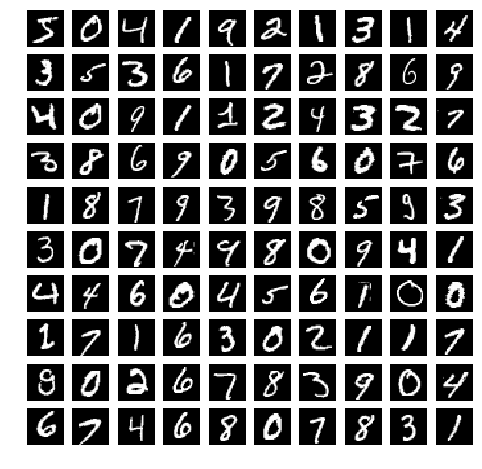

In [5]:
fig, axes = plt.subplots(10, 10, figsize = (8, 8))

for i in range(10):
    for j in range(10):
        ax = axes[i][j]
        ax.imshow(X_train[i * 10 + j].reshape(28, 28), cmap = plt.get_cmap('gray'))
        ax.axis('off')

In [6]:
class Mnist_3NN(object):
    import numpy as np
    
    def __init__(self, random_number):
        rng = np.random.RandomState(random_number)
        W1, b1 = rng.normal(size = (784, 10)), rng.normal(size = (10,))
        W2, b2 = rng.normal(size = (10, 10)), rng.normal(loc = -1, scale = 2, size = (10,))
        self.W1, self.b1, self.W2, self.b2 = W1, b1, W2, b2
    
    def relu(x):
        return np.where(x < 0, 0, x)
    
    def softmax(x):
        nom = np.exp(x - np.max(x, axis = 1)[:, np.newaxis])
        denom = np.sum(nom, axis = 1)[:, np.newaxis]
        return nom / denom
    
    def forward(self, x):
        a1 = np.dot(x, self.W1) + self.b1
        h1 = Mnist_3NN.relu(a1)
        a2 = np.dot(a1, self.W2) + self.b2
        h2 = Mnist_3NN.softmax(a2)
        return h2
    
    def predict(self, x):
        prob = self.forward(x)
        pred = np.argmax(prob, axis = 1)
        return pred 
    
    def get_accuracy(self, x, y):
        pred = self.predict(x)
        return np.mean(pred == y)

In [7]:
mnist = Mnist_3NN(random_number = 0)
mnist.get_accuracy(X_train, y_train), mnist.get_accuracy(X_test, y_test)

(0.0976, 0.0965)

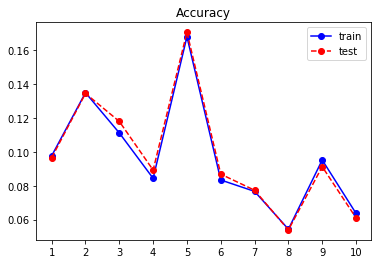

In [8]:
score1 = []
score2 = []

for i in range(10):
    mnist = Mnist_3NN(random_number = i)
    res = mnist.get_accuracy(X_train, y_train)
    score1.append(res)
    res = mnist.get_accuracy(X_test, y_test)
    score2.append(res)
    
plt.plot(range(10), score1, 'o-', c = 'blue', label  = 'train')
plt.plot(range(10), score2, 'o--', c = 'red', label = 'test')
plt.legend()
plt.xticks(range(10), [str(x) for x in range(1, 11)])
plt.title('Accuracy')
plt.show()